# Исследование поездок пользователей сервиса электросамокатов GoFast

**Заголовок:** Исследование поездок пользователей сервиса электросамокатов GoFast

**Описание проекта:** С недавнего времени популярным транспортом для передвижения по городу, помимо метро, автобусов и трамваев, автомобилей и такси, стали электросамокаты. Данный вид транспорта помогает достаточно быстро добраться из точки А в точку Б, поскольку не нужно стоять в пробке, ждать, пока приедет нужный автобус, или переживать, что метро закроется. Что уж говорить о полезности для физического здоровья. С помощью данных о поездках пользователей, которые включают в себя данные о стоимости подписки, времени и длительности поездки, мы хотим определить основные факторы, влияющие на величину доходов от пользователей с полпиской и без нее, а также проверить некоторые гипотезы.

**Цель исследования:** Определить основной сегмент пользователей сервисом, определить факторы, влияющие на размер выручки,а также проверить следующие гипотезы:
- Тратят ли пользователи с подпиской больше времени на поездки?
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? (оптимальным расстоянием считается 3130 метров с точки зрения износа самоката, данная гипотеза поможет нам предотвартить лишние потери)
- Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки - это необходимо для того, чтобы определить, на какую долю пользователей нам работать выгоднее.
- Снизилось ли количество обращений в поддержку после обновления сервера - необходимо для того, чтобы оценить работу технического отдела.

**Ход исследования:**

- Шаг 1. Загрузка данных: загрузка и изучение общей информации из датасетов.
- Шаг 2. Предобработка данных: обработка пропущенных значений, дубликатов, корректировка типа данных, и других аномалий. Добавление нового столбца с месяцем для подсчета помесячной выручки
- Шаг 3. Исследовательский анализ данных: изучение основных параметров пользователей, их распределения, зависимости продолжительности и расстояния поездок от типа подписки, основные различия между пользователями с подпиской и без, а также выявление и обработка аномалий.
- Шаг 4. Объединение данных: объединение всех датафреймов в один, оценка и визуализация параметров продолжительности и расстояния поездки отдельно для каждой категории пользователей, сравнение.
- Шаг 5. Подсчет выручки: агрегирование данных пользователей по меясцам, подсчет помесячной выручки по каждому пользователю.
- Шаг 6. Проверка гипотез: применение t-тестов для анализа гипотез, выводы по каждой гипотезе (Отвергаем / Не отвергаем нулевую гипотезу)

**Общий вывод:** резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций. С помощью данного исследования мы стремимся выявить и проанализировать факторы, влияющие на доходность сервиса, что в дальнейшем поможет определить необходимость введения различных бонусных программ, а также изменения политики ценообразования.

## Шаг 1. Загрузка данных

In [1]:
# импортируем нужные библиотеки

import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# откроем методом read_csv нужные датасеты

try:
    users = pd.read_csv('C:/Users/anysh/Desktop/Практикум/Датасеты/стат анализ/users_go.csv')
    rides = pd.read_csv('C:/Users/anysh/Desktop/Практикум/Датасеты/стат анализ/rides_go.csv')
    subscriptions = pd.read_csv('C:/Users/anysh/Desktop/Практикум/Датасеты/стат анализ/subscriptions_go.csv')
except:
    users = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

Изучим датафреймы: выведем первые пять строк, чтобы убедиться, что данные корректно считались, а также общую информацию.

In [3]:
display(users.head(5))
users.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В таблице ```users``` представлена информация по пользователям: нам известен айди (больше похож на порядковый номер), имя, возраст, город, а также тип подписки.

Судя по информации, полученной методом ```info()``` , пропусков у нас в данной таблице не наблюдается (однако позже мы проверим, есть ли они), все столбцы представлены логичным типом данных. Поехали дальше!

In [4]:
display(rides.head(5))
rides.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В таблице ```rides``` нам представлена информация о поездках по пользователям (которых можно идентифицировать с помощью столбца ```user_id```): дистанция за поездку, время поездки и дата.

С помощью метода ```info``` видим, что, вероятно, пропусков нет (мы также проверим это позднее), и есть необходимость перевести столбец с датой из ```object``` в ```datetime```.

In [5]:
display(subscriptions.head(5))
subscriptions.info()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Данная табличка совсем маленькая, содержит в себе информацию о стоимости поездки в минуту, стоимости начала поездки и стоимости подписки в месяц. Понадобится нам для расчетов средних затрат по подпискам и построении гипотез.

## Шаг 2. Предобработка данных

### 2.1 Изменение типа столбца

In [6]:
# используем метод to_datetime()

rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [7]:
# проверим, изменился ли тип

rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


### 2.2 Добавление нового столбца

Добавим столбец с месяцем поездки с помощью атрибута ```month```:

In [8]:
rides['month'] = pd.DatetimeIndex(rides['date']).month

In [9]:
# проверим, корректно ли добавился новый столбец

rides.head(5)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### 2.3 Проверка пропущенных значений и дубликатов

Исходя из того, что нам показал метод ```info```, пропущенных значений может и не быть. Проверим методом ```isna``` их отсутстствие (или наличие).

In [10]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [11]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Пропусков нет, перейдем к дубликатам.

In [12]:
users.duplicated().sum(), rides.duplicated().sum()

(31, 0)

In [13]:
users[users.duplicated()]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


В таблице ```users``` наблюдаем явные дубликаты. Удалим их методом ```drop_duplicates``` с новой индексацией.

In [14]:
users = users.drop_duplicates().reset_index(drop=True)

In [15]:
# проверим наличие явных дубликатов
users.duplicated().sum()

0

Явных дубликатов не осталось.

По логике таблица ```users``` должна содержать уникальные значения по каждому клиенту. Явные дубликаты может содержать столбец с городами. Проверим все уникальные значения.

In [16]:
# проверим уникальные названия городов методом unique()
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявных дубликатов также нет. Отлично!

Мы изучили таблицы, обработали дубликаты. Таблицу ```subsriptions``` не обрабатывали - в ней всего две строки с информацией о стоимости поездки и подписки, дубликатов и пропусков там точно нет :)

Можно приступать к исследовательскому анализу данных.

## Шаг 3. Исследовательский анализ данных

### 3.1. Частота встречаемости городов

Посмотрим, в каких городах наиболее часто пользуются нашим сервисом. Можно просто вывести количество уникальных значений, либо построить гистограмму с числом значений по городам.

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.1+ KB


In [18]:
# построим сводную таблицу pivot_table

data_users = users.pivot_table(index='city', values='user_id', aggfunc='count')\
.sort_values(by='user_id', ascending=False)

data_users

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


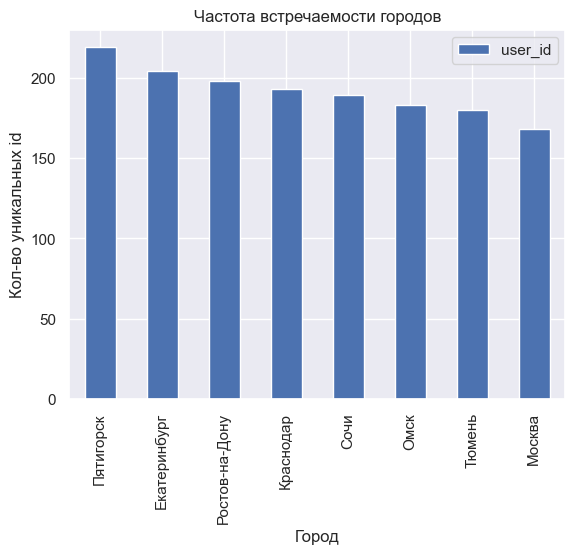

In [19]:
# построим барплот, подпишем оси и график

data_users.plot(title = 'Частота встречаемости городов', kind='bar', xlabel = 'Город', ylabel = 'Кол-во уникальных id')
plt.show()

Как видим, сервисом пользуются чаще в городе Пятигорск, и реже в городе Москва. Удивительно и интересно.

### 3.2 Соотношение пользователей с подпиской и без подписки

Построим сводную таблицу по подпискам, переименуем столбцы в "Тип подписки", "Количество, шт":

In [20]:
data_subscrib = users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
data_subscrib.rename(columns={'user_id': 'Количество, шт'}, inplace=True)
data_subscrib.rename_axis(index={'subscription_type': 'Тип подписки'}, inplace=True)

Создадим столбец "Соотношение, %" на основе столбцов, и выведем датафрейм.

In [21]:
data_subscrib['Соотношение, %'] = round(data_subscrib['Количество, шт'] / data_subscrib['Количество, шт'].sum(), 2) * 100
data_subscrib

,"Количество, шт","Соотношение, %"
Тип подписки,,
free,835,54.0
ultra,699,46.0


Видим, что среди пользователей сервиса больше тех, кто катается без подписки - **54%**. Немногим больше, чем подписчиков, которых **46%**.

Можно также построить круговую диаграмму для визуализации данных.

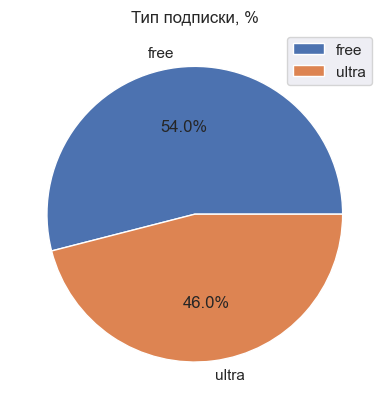

In [22]:
data_subscrib.plot(title = 'Тип подписки, %', kind='pie', y='Соотношение, %', ylabel='', autopct='%1.1f%%')
plt.show()

### 3.3 Возраст пользователей

Посмотрим уникальные значение возрастов. Если значений слишком много - категоризируем данные по большим группам.

In [23]:
sorted(users['age'].unique())

[12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 43]

Разброс от 12 до 43 лет. Можно предложить следующую классификацию:
- Несовершеннолетние (до 18 лет)
- Совершеннолетние (от 18 включительно)

Можно также использовать ```qcut()``` для определения равных частей по категориям (например, по двум)

In [24]:
pd.qcut(users['age'], 2)

0       (11.999, 25.0]
1         (25.0, 43.0]
2       (11.999, 25.0]
3         (25.0, 43.0]
4         (25.0, 43.0]
             ...      
1529      (25.0, 43.0]
1530    (11.999, 25.0]
1531      (25.0, 43.0]
1532    (11.999, 25.0]
1533    (11.999, 25.0]
Name: age, Length: 1534, dtype: category
Categories (2, interval[float64, right]): [(11.999, 25.0] < (25.0, 43.0]]

Но возраст важен с точки зрения закона, поэтому оставим категорию выше (до 18 и после).

In [25]:
# напишем фуyкцию age()

def age(x):
    try:
        if x < 18:
            return 'Несовершеннолетние'
        return 'Совершеннолетние'
    except:
        return 'not defined'

In [26]:
# применим функцию к столбцу age и запишем в новый столбец age_category

users['age_category'] = users['age'].apply(age)

In [27]:
# выведем первые пять строк таблицы users, чтобы проверить, как записалась категория

users.head(5)

,user_id,name,age,city,subscription_type,age_category
0,1,Кира,22,Тюмень,ultra,Совершеннолетние
1,2,Станислав,31,Омск,ultra,Совершеннолетние
2,3,Алексей,20,Москва,ultra,Совершеннолетние
3,4,Константин,26,Ростов-на-Дону,ultra,Совершеннолетние
4,5,Адель,28,Омск,ultra,Совершеннолетние


In [28]:
users['age_category'].unique()

array(['Совершеннолетние', 'Несовершеннолетние'], dtype=object)

Составим барплот, чтобы визуализировать данные о возрасте пользователей.

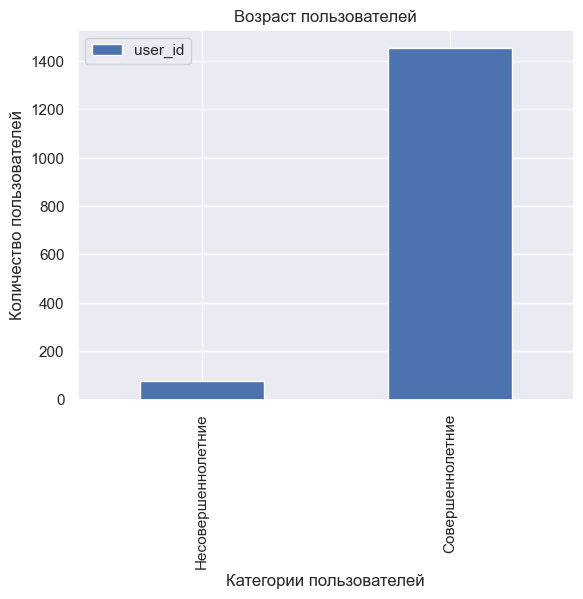

In [29]:
users.pivot_table(index='age_category', values='user_id', aggfunc='count')\
.plot(title = 'Возраст пользователей', kind='bar', xlabel = 'Категории пользователей', ylabel = 'Количество пользователей')
plt.show()

In [30]:
# создадим датафрейм с помощью метода pivot_table(), переименуем столбцы

data_age = users.pivot_table(index='age_category', values='user_id', aggfunc='count')
data_age.rename(columns={'user_id': 'Количество, чел.'}, inplace=True)
data_age.rename_axis(index={'age_category': 'Возраст'}, inplace=True)

In [31]:
# добавим долю категории к общему числу пользователей

data_age['Соотношение, %'] = round(data_age['Количество, чел.'] / data_age['Количество, чел.'].sum(), 2) * 100
data_age

,"Количество, чел.","Соотношение, %"
Возраст,,
Несовершеннолетние,79,5.0
Совершеннолетние,1455,95.0


Доля несовершеннолетних - 5%. Небольшая часть, но логически лучше оставить такую категорию - часто несовершеннолетним нельзя кататься и использовать приложение без родительского контроля. По крайней мере теперь мы понимаем, что доля недееспособных пользователей крайне мала, и можно в дальнейшем строить гипотезы о рекламе или спец предложениях без учета строгих ограничений.

Узнаем, какой же возраст у основной части пользователей. Предлагаем составить гистограмму, чтобы увидеть распределение.

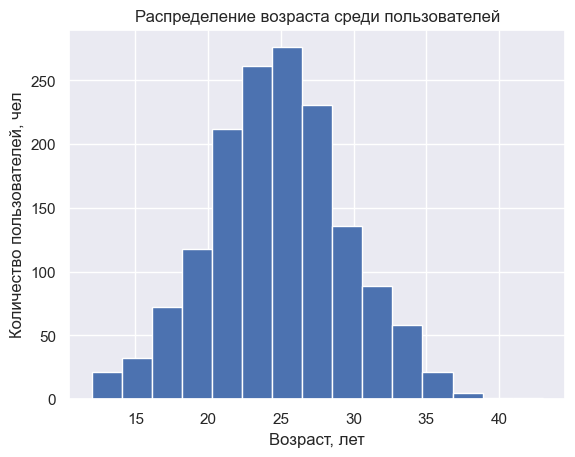

In [32]:
users.hist('age', bins=15)
plt.title('Распределение возраста среди пользователей')
plt.xlabel('Возраст, лет')
plt.ylabel('Количество пользователей, чел')
plt.show()

Чтобы точно определить вершину гистограммы, можно использовать метод median(), а средний разброс нам нужен для определния ширины колокола распределения.

In [33]:
users['age'].median(), users['age'].std()

(25.0, 4.572366657419865)

Получается, что основной возраст пользователей сервиса от 21 до 29 лет (можно очень грубо округлить и получим диапазон от 20 до 30 лет).

Неплохо, учитывая, что возраст молодежи определяется в диапазоне от 14 до 35 включительно, можно сказать, что наша целевая аудитория - совершеннолетняя молодежь)

### 3.4 Расстояние, которое пользователь преодолел за одну поездку

Здесь мы можем посмотреть среднее (или медианное) значение одной поездки среди всех пользователей

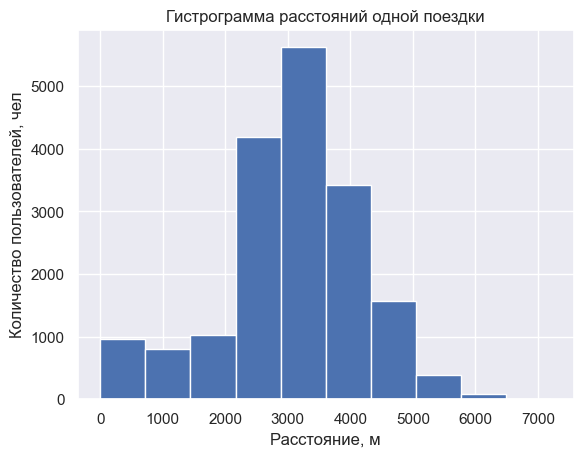

In [34]:
rides.hist('distance', bins=10, grid=True)
plt.title('Гистрограмма расстояний одной поездки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей, чел')
plt.show()

Распределение похоже на нормальное, посмотрим на "ящик с усами" и информацию по данному столбцу

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

<Axes: >

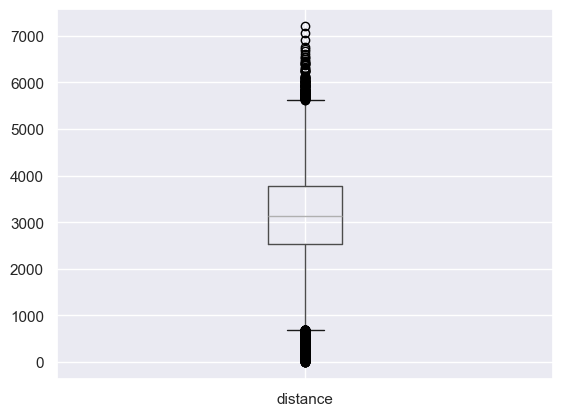

In [35]:
display(rides['distance'].describe())
rides.boxplot('distance')

Да, много выбросов. Уберем их, определив минимальные и максимальные значения следующим образом:
- Минимальные значения = (1.5 * IQR) - Q1 = 1.5 * (Q3-Q1) - Q1
- Максимальные значения = = (1.5 * IQR) - Q3 = 1.5 * (Q3-Q1) - Q3

In [36]:
minq1 = abs((3776.222735 - 2543.226360) * 1.5 - 2543.226360)
maxq3 = abs((3776.222735 - 2543.226360) * 1.5 + 3776.222735)
minq1, maxq3

(693.7317975000005, 5625.717297499999)

In [37]:
rides_good = rides.query('@minq1 < distance < @maxq3')

count    17032.000000
mean      3191.828731
std        928.872994
min        693.961245
25%       2643.794329
50%       3173.942690
75%       3806.190184
max       5623.316154
Name: distance, dtype: float64

<Axes: >

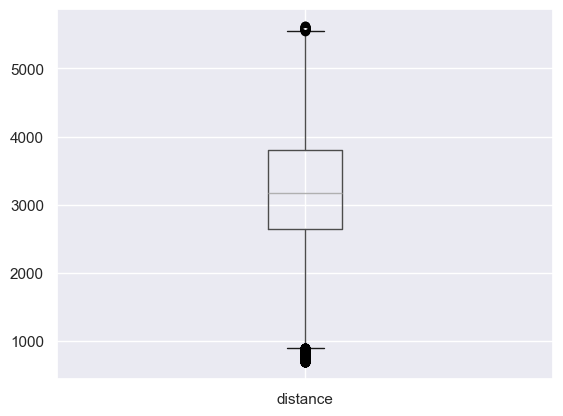

In [38]:
display(rides_good['distance'].describe())
rides_good.boxplot('distance')

Зададим иные значения для порогов выбросов

In [39]:
minq1 = 1000
maxq3 = 5500
rides_good = rides_good.query('@minq1 < distance < @maxq3')

count    16526.000000
mean      3251.265733
std        846.205833
min       1001.469328
25%       2690.965457
50%       3202.130808
75%       3826.587299
max       5494.799099
Name: distance, dtype: float64

<Axes: >

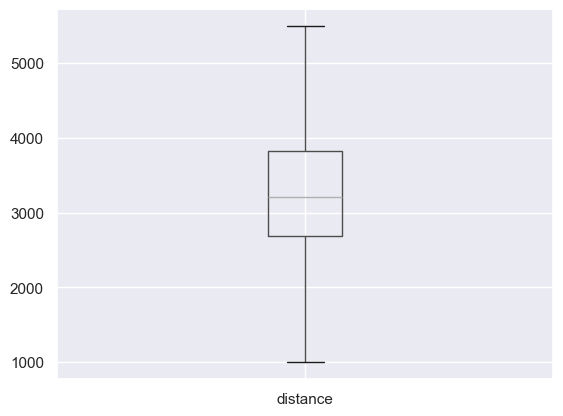

In [40]:
display(rides_good['distance'].describe())
rides_good.boxplot('distance')

Избавились от выбросов, количество записей при этом стало на 2,5 тысячи меньше.При этом среднее практически равно медианному значению. Посмотрим еще раз на гистограмму.

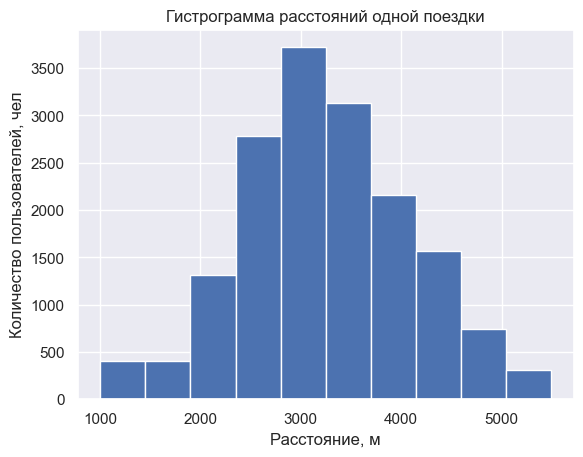

In [41]:
rides_good.hist('distance', bins=10, grid=True)
plt.title('Гистрограмма расстояний одной поездки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей, чел')
plt.show()

Гистограмма показывает нормальное распределение - в среднем пользователи проезжают около 3 км.

### 3.5 Продолжительность поездок

Расстояния изучили, теперь посмотрим, сколько времени занимет в среднем поездка. Алгоритм схож с предыдущим пунктом: посмотрим на распредление, выбросы, очистим, если они есть, и выясним, сколько в среднем пользователи тратят на одну поездку на самокате.

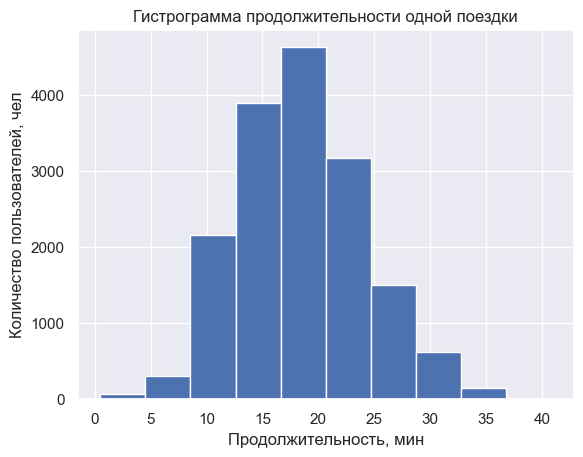

In [42]:
rides_good.hist('duration', bins=10, grid=True)
plt.title('Гистрограмма продолжительности одной поездки')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество пользователей, чел')
plt.show()

Распределение похоже на нормальное, посмотрим на "ящик с усами".

count    16526.000000
mean        18.451931
std          5.674869
min          0.500000
25%         14.378122
50%         18.206170
75%         22.020830
max         40.823963
Name: duration, dtype: float64

<Axes: >

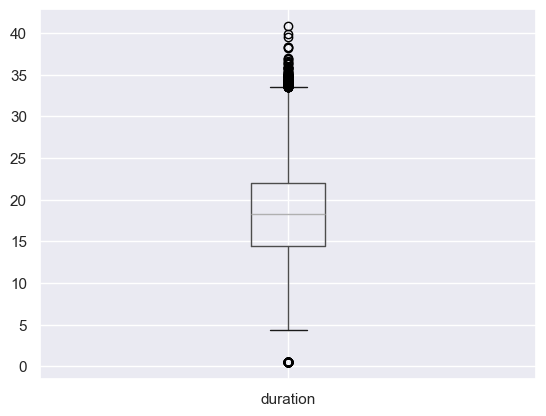

In [43]:
display(rides_good['duration'].describe())
rides_good.boxplot('duration')

In [44]:
minq1= 14.378122 - 1.5 * (22.020830 - 14.378122)
maxq3 = 1.5*(22.020830 - 14.378122) + 22.020830
minq1, maxq3

(2.9140599999999974, 33.484892)

Выбросы также имеются: поездка меньше минуты (0.5), и свыше 33 минут. Удалим эти выбросы.

In [45]:
rides_good_time = rides_good.query('3 <= duration <= 33')

count    16316.000000
mean        18.395972
std          5.386681
min          4.357290
25%         14.404137
50%         18.176680
75%         21.930397
max         32.998485
Name: duration, dtype: float64

<Axes: >

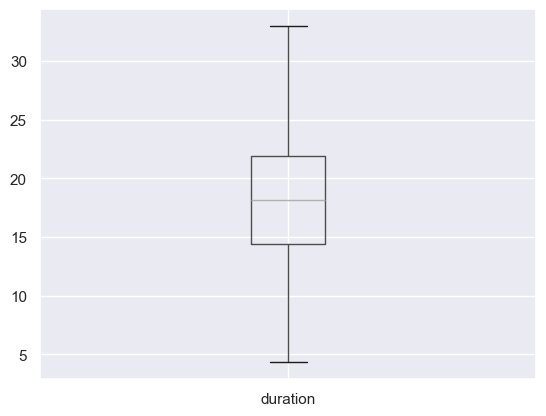

In [46]:
display(rides_good_time['duration'].describe())
rides_good_time.boxplot('duration')

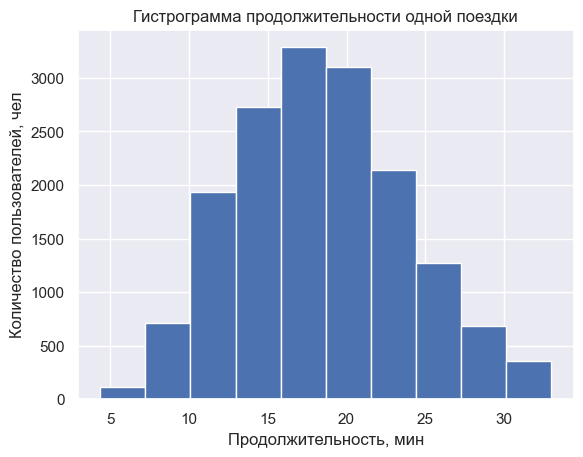

In [47]:
rides_good_time.hist('duration', bins=10, grid=True)
plt.title('Гистрограмма продолжительности одной поездки')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество пользователей, чел')
plt.show()

Гистограмма имеет вид нормального распределения. Среднее с медианой тоже практически совпадают. Можно сказать, что в среднем время одной поездки составляет около 18-19 минут.

## Шаг 4. Объединение данных

### 4.1 Объединенние всех датафреймов в один

In [48]:
# объединим таблицы с помощью метода merge()

data_merge = users.merge(rides, on='user_id', how='outer')
data_merge = data_merge.merge(subscriptions, on='subscription_type', how='outer')

In [49]:
# выведем информацию о новой таблице и первые пять строк

display(data_merge.head(5))
data_merge.info()

,user_id,name,age,city,subscription_type,age_category,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,Совершеннолетние,2515.690719,14.944286,2021-01-02,1,8,50,0
1,700,Айдар,22,Омск,free,Совершеннолетние,846.932642,16.234663,2021-02-01,2,8,50,0
2,700,Айдар,22,Омск,free,Совершеннолетние,4004.434142,20.016628,2021-02-04,2,8,50,0
3,700,Айдар,22,Омск,free,Совершеннолетние,1205.911290,9.782872,2021-02-10,2,8,50,0
4,700,Айдар,22,Омск,free,Совершеннолетние,3047.379435,17.427673,2021-02-14,2,8,50,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   age_category       18068 non-null  object        
 6   distance           18068 non-null  float64       
 7   duration           18068 non-null  float64       
 8   date               18068 non-null  datetime64[ns]
 9   month              18068 non-null  int32         
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(

Проверим наличие полных дубликатов

In [50]:
data_merge.duplicated().sum()

0

Полных дубликатов нет. Отлично! Переходим к следующему шагу.

### 4.2 Создание датафреймов

Создадим два датафрейма из общего:
- с подпиской
- без подписки

применив метод ```query()```

In [51]:
data_subscribers = data_merge.query('subscription_type == "ultra"')

In [52]:
data_non_subscribers = data_merge.query('subscription_type == "free"')

In [53]:
data_subscribers['subscription_type'].unique()

array(['ultra'], dtype=object)

In [54]:
data_non_subscribers['subscription_type'].unique()

array(['free'], dtype=object)

### 4.3 Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

#### 4.3.1 Визуализация информации о пользователях с подпиской

Изучим данные о пользователях, которые владеют подпиской.

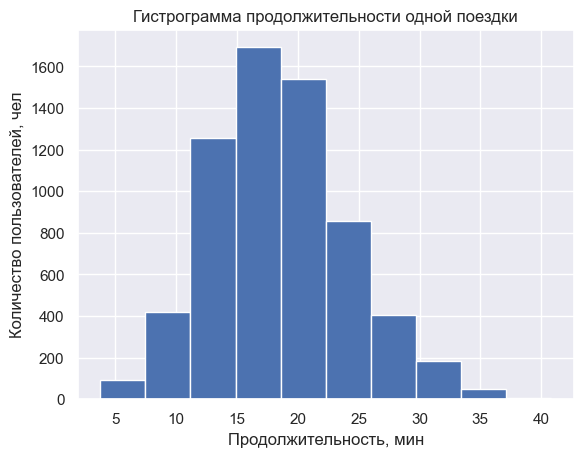

In [55]:
data_subscribers.hist('duration', bins=10, grid=True)
plt.title('Гистрограмма продолжительности одной поездки')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество пользователей, чел')
plt.show()

Гистограмма отражает нормальное распредление. Посмотрим, что с расстояниями.

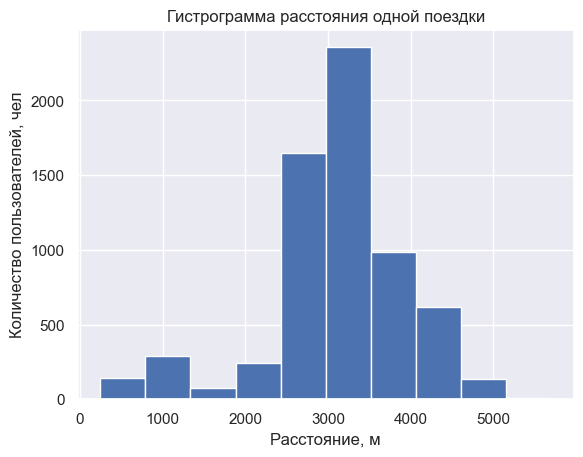

In [56]:
data_subscribers.hist('distance', bins=10, grid=True)
plt.title('Гистрограмма расстояния одной поездки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей, чел')
plt.show()

Вот расстояния уже распределены как бы равномерно. Нужно изучить выбросы обоих показателей.

Но для начала посмотрим, есть ли корреляция между этими двуми показателями.
Напомним: коэффициент корреляции Пирсона показывает, как одна переменная меняется в зависимости от другой.

In [57]:
data_subscribers['duration'].corr(data_subscribers['distance'])

0.4933405982485452

Коэффициент корреляции составляет 0.49. Это значит, что расстояние несильно зависит от длительности поездки (хотя логично было бы предположить, что чем больше расстояние, тем дольше по времени едет пользователь, и соотвественно изменение должно быть линейным и сонаправленным).

Переходим к ящикам с усами.

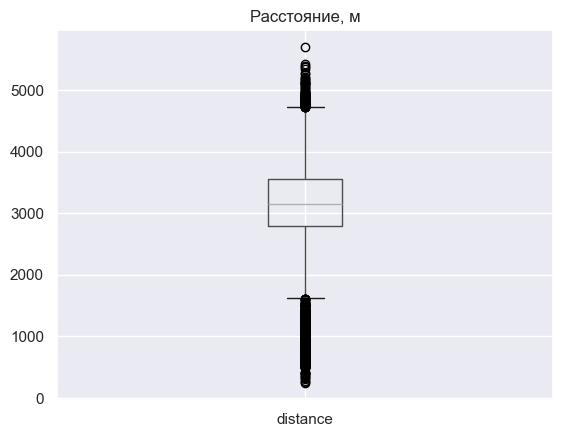

In [58]:
data_subscribers.boxplot('distance').set_title('Расстояние, м')
plt.show()

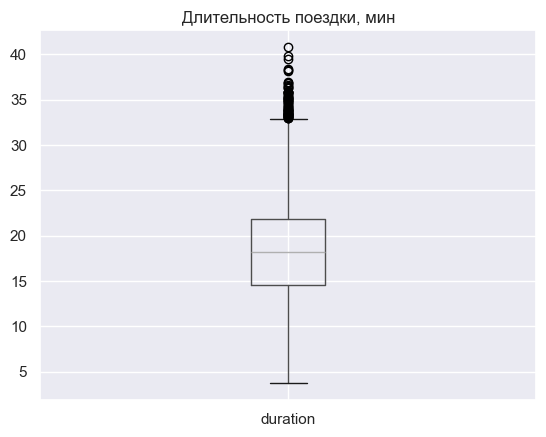

In [59]:
data_subscribers.boxplot('duration').set_title('Длительность поездки, мин')
plt.show()

Избавимся от выбросов.

count    6396.000000
mean       18.289459
std         5.244883
min         3.760353
25%        14.456595
50%        18.076702
75%        21.696467
max        31.976730
Name: duration, dtype: float64

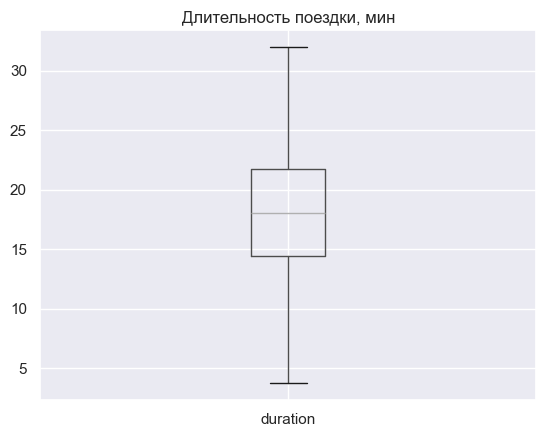

In [60]:
data_subscribers_good = data_subscribers.query('duration <= 32')
display(data_subscribers_good['duration'].describe())
data_subscribers_good.boxplot('duration').set_title('Длительность поездки, мин')
plt.show()

count    6396.000000
mean     3099.278685
std       831.886228
min       244.210438
25%      2776.730957
50%      3137.980965
75%      3538.809709
max      5699.769662
Name: distance, dtype: float64

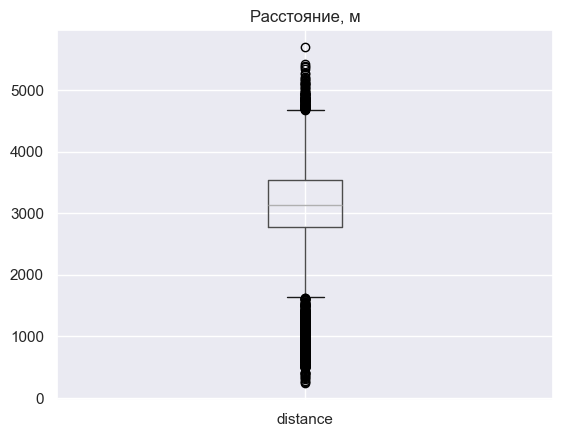

In [61]:
display(data_subscribers_good['distance'].describe())
data_subscribers_good.boxplot('distance').set_title('Расстояние, м')
plt.show()

In [62]:
minq1= 2776.730957 - 1.5 * (3538.809709 - 2776.730957)
maxq3 = 1.5*(3538.809709 - 2776.730957) + 3538.809709
minq1, maxq3

(1633.6128290000004, 4681.927837)

In [63]:
data_subscribers_good = data_subscribers_good.query('1850 <= distance <= 4500')

count    5685.000000
mean     3225.802927
std       516.241032
min      1878.496123
25%      2862.487857
50%      3164.597189
75%      3529.341217
max      4497.824936
Name: distance, dtype: float64

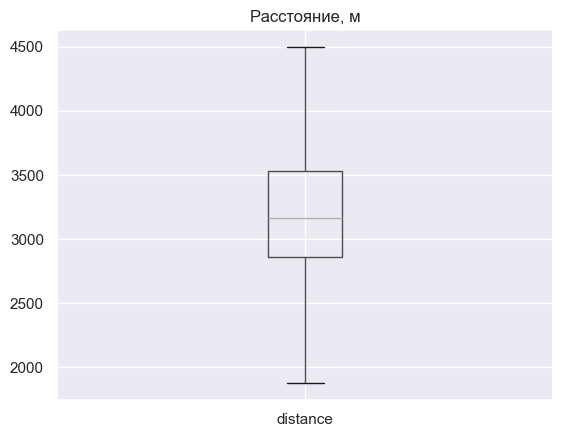

In [64]:
display(data_subscribers_good['distance'].describe())
data_subscribers_good.boxplot('distance').set_title('Расстояние, м')
plt.show()

От выбросов избавились, теперь посмотрим на гистограммы.

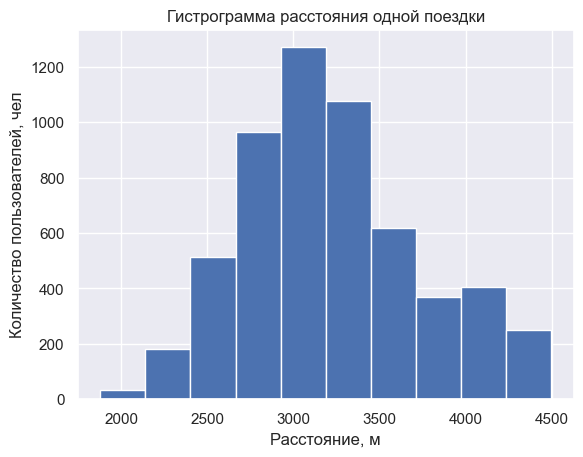

In [65]:
data_subscribers_good.hist('distance', bins=10, grid=True)
plt.title('Гистрограмма расстояния одной поездки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей, чел')
plt.show()

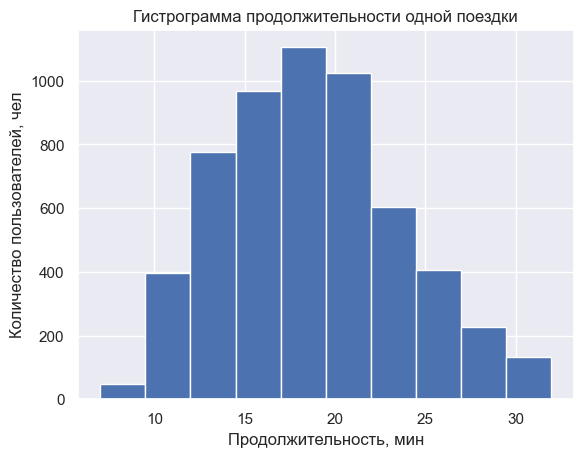

In [66]:
data_subscribers_good.hist('duration', bins=10, grid=True)
plt.title('Гистрограмма продолжительности одной поездки')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество пользователей, чел')
plt.show()

Мы видим, что в среднем пользователи с подпиской совершают поездки либо длительностью около 18-19 минут, либо на расстоянии около 3100-3200 метров.

In [67]:
data_subscribers['duration'].corr(data_subscribers['distance'])

0.4933405982485452

Корелляция не изменилась, значит, не стоит делать вывод о том, что чем больше расстояние, тем дольше по времени поездка.

Переходим к пользователям без подписки.

#### 4.3.2 Визуализация информации о пользователях без подписки

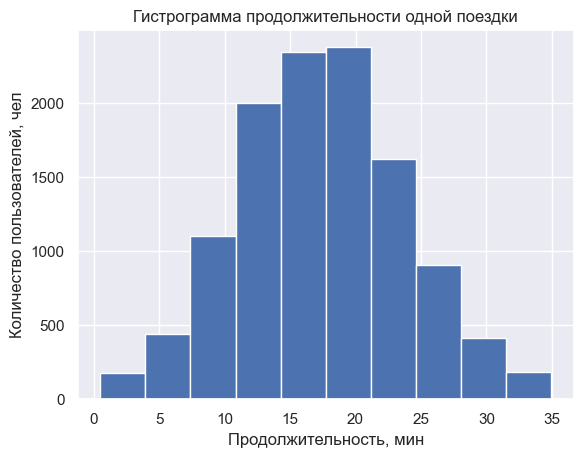

In [68]:
data_non_subscribers.hist('duration', bins=10, grid=True)
plt.title('Гистрограмма продолжительности одной поездки')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество пользователей, чел')
plt.show()

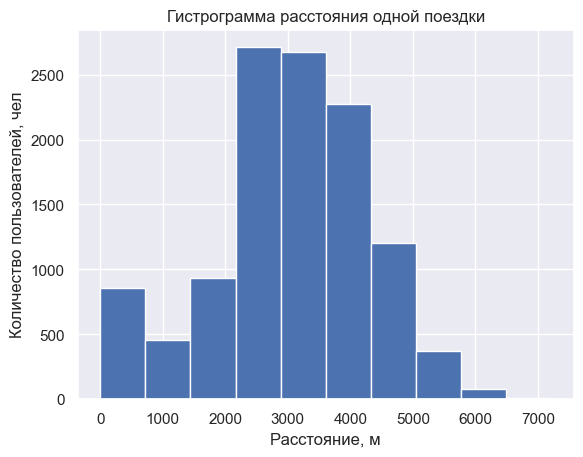

In [69]:
data_non_subscribers.hist('distance', bins=10, grid=True)
plt.title('Гистрограмма расстояния одной поездки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей, чел')
plt.show()

Графики отражают нормальное распределение. Посмотрим на выбросы в данных, а также вероятную корреляцию.

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

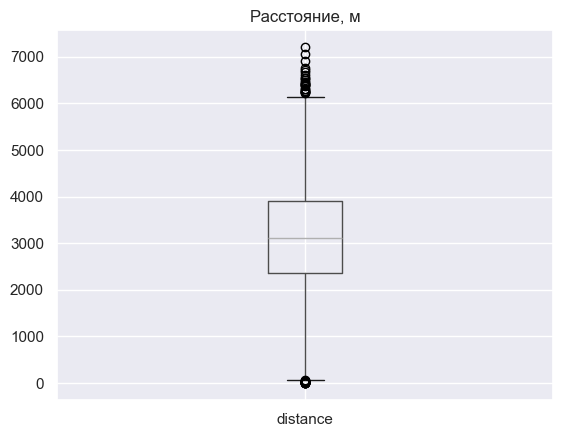

In [70]:
display(data_non_subscribers['distance'].describe())
data_non_subscribers.boxplot('distance').set_title('Расстояние, м')
plt.show()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

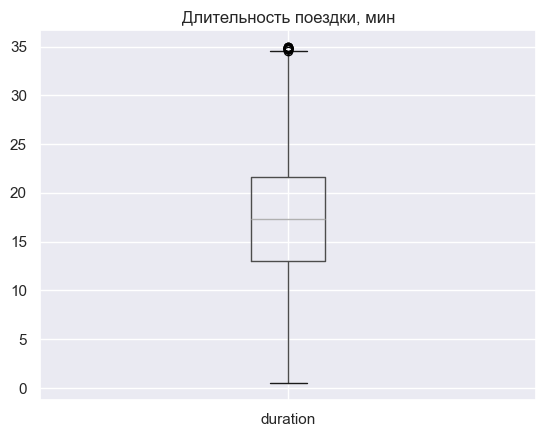

In [71]:
display(data_non_subscribers['duration'].describe())
data_non_subscribers.boxplot('duration').set_title('Длительность поездки, мин')
plt.show()

In [72]:
data_non_subscribers['duration'].corr(data_non_subscribers['distance'])

0.5557785138794201

Коэффициент корреляции 0.56 - указывает на несильную связь двух переменных, сонаправленно изменяющихся.
Незначительные выбросы имеются по столбцу ```duration``` - поездки длительностью свыше 35 минут уже считаются выбросами, немного больше наблюдаем в значениях столбца ```distance``` - поездки на расстоянии чуть больше 6 км и около нуля км тоже считаются выбросами. Удалим их.

In [73]:
data_non_subscribers_good = data_non_subscribers.query('(duration <= 34) and (100 <= distance <= 6000)')

count    11412.000000
mean        17.400283
std          6.205031
min          0.500000
25%         13.030201
50%         17.343167
75%         21.561226
max         33.987400
Name: duration, dtype: float64

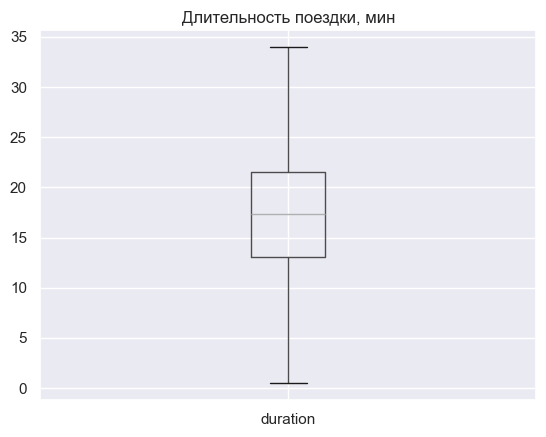

In [74]:
display(data_non_subscribers_good['duration'].describe())
data_non_subscribers_good.boxplot('duration').set_title('Длительность поездки, мин')
plt.show()

count    11412.000000
mean      3048.617857
std       1209.568490
min        102.323624
25%       2375.974839
50%       3114.648465
75%       3893.951807
max       5991.817697
Name: distance, dtype: float64

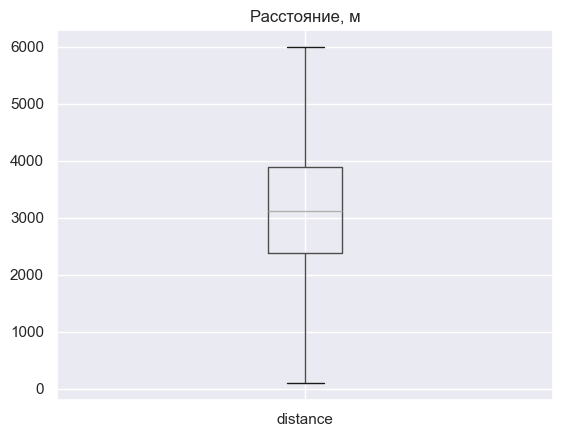

In [75]:
display(data_non_subscribers_good['distance'].describe())
data_non_subscribers_good.boxplot('distance').set_title('Расстояние, м')
plt.show()

Разобрались с выбросами, посмотрим еще раз на гистрограммы.

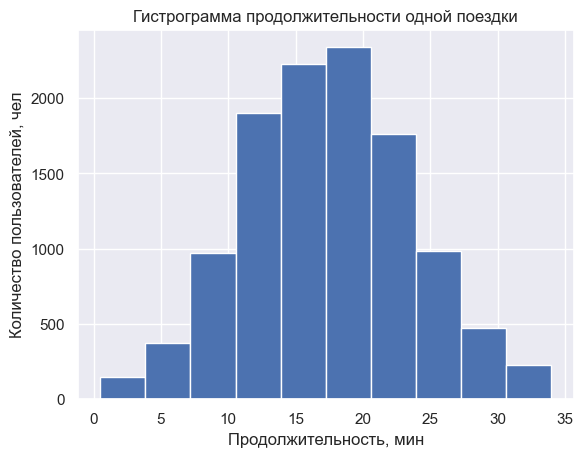

In [76]:
data_non_subscribers_good.hist('duration', bins=10, grid=True)
plt.title('Гистрограмма продолжительности одной поездки')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество пользователей, чел')
plt.show()

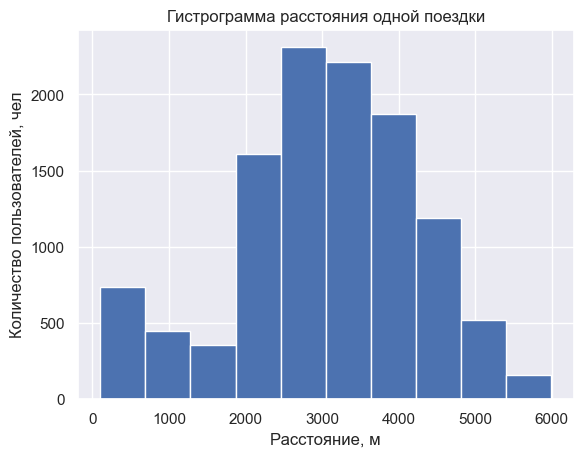

In [77]:
data_non_subscribers_good.hist('distance', bins=10, grid=True)
plt.title('Гистрограмма расстояния одной поездки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей, чел')
plt.show()

In [78]:
data_non_subscribers['duration'].corr(data_non_subscribers['distance'])

0.5557785138794201

Гистрограмма продолжительности поездки отражает нормально ераспредление, а вот гистограмма расстояния одной поездки отражает распределение, похожее на Пуассона. Можно сделать вывод, что пользователи без подписки либо совершают поездки по времени около 17 минут, либо по расстоянию около 3000-3100 метров.

Если сравнивать с пользователями с подписками, то пользователи без подписки проезжают на 100 метров меньше; по времени пользователи с подпиской используют самокат на минуту дольше.

## Шаг 5. Подсчёт выручки

###  5.1 Агрегирование данных по пользователям: суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [79]:
data_merge.head(5)

,user_id,name,age,city,subscription_type,age_category,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,Совершеннолетние,2515.690719,14.944286,2021-01-02,1,8,50,0
1,700,Айдар,22,Омск,free,Совершеннолетние,846.932642,16.234663,2021-02-01,2,8,50,0
2,700,Айдар,22,Омск,free,Совершеннолетние,4004.434142,20.016628,2021-02-04,2,8,50,0
3,700,Айдар,22,Омск,free,Совершеннолетние,1205.911290,9.782872,2021-02-10,2,8,50,0
4,700,Айдар,22,Омск,free,Совершеннолетние,3047.379435,17.427673,2021-02-14,2,8,50,0


Для точности расчета округлим значением столбца ```duration```

In [80]:
data_merge['duration'] = np.ceil(data_merge['duration'])

In [81]:
data_group = data_merge.pivot_table(
    index=['user_id', 'month', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee'], \
    values=['duration', 'distance'], aggfunc={'duration': ['sum', 'count'], 'distance': 'sum'})
data_group.reset_index(inplace=True)
data_group

user_id month subscription_type minute_price start_ride_price  \
                                                                      
0           1     1             ultra            6                0   
1           1     4             ultra            6                0   
2           1     8             ultra            6                0   
3           1    10             ultra            6                0   
4           1    11             ultra            6                0   
...       ...   ...               ...          ...              ...   
11326    1534     6              free            8               50   
11327    1534     8              free            8               50   
11328    1534     9              free            8               50   
11329    1534    11              free            8               50   
11330    1534    12              free            8               50   

      subscription_fee      distance duration        
                                 sum    count   sum  
0                  199   7027.511294        2  42.0  
1                  199    754.159807        1   7.0  
2                  199   6723.470560        2  46.0  
3                  199   5809.911100        2  32.0  
4                  199   7003.499363        3  56.0  
...                ...           ...      ...   ...  
11326                0   3409.468534        2  26.0  
11327                0   7622.453034        2  48.0  
11328                0   4928.173852        1  23.0  
11329                0  13350.015305        4  78.0  
11330                0   2371.711192        1  16.0  

[11331 rows x 9 columns]

Для удобства пользования таблицей изменим индексацию столбцов и названия.

In [82]:
# изменим индексацию колонок и выведем талбицу

data_group = data_group.droplevel(1, axis=1)
data_group

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,duration
0,1,1,ultra,6,0,199,7027.511294,2,42.0
1,1,4,ultra,6,0,199,754.159807,1,7.0
2,1,8,ultra,6,0,199,6723.470560,2,46.0
3,1,10,ultra,6,0,199,5809.911100,2,32.0
4,1,11,ultra,6,0,199,7003.499363,3,56.0
...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,8,50,0,3409.468534,2,26.0
11327,1534,8,free,8,50,0,7622.453034,2,48.0
11328,1534,9,free,8,50,0,4928.173852,1,23.0
11329,1534,11,free,8,50,0,13350.015305,4,78.0


In [83]:
# узнаем идексы нужных столбцов для переименования 

data_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            11331 non-null  int64  
 1   month              11331 non-null  int32  
 2   subscription_type  11331 non-null  object 
 3   minute_price       11331 non-null  int64  
 4   start_ride_price   11331 non-null  int64  
 5   subscription_fee   11331 non-null  int64  
 6   distance           11331 non-null  float64
 7   duration           11331 non-null  int64  
 8   duration           11331 non-null  float64
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 752.6+ KB


In [84]:
# переименовываем столбцы и выводим таблицу, чтобы удостовериться в правильности

data_group.columns.values[7] = 'total_distance'
data_group.columns.values[7] = 'total_rides'
data_group.columns.values[8] = 'total_duration'
data_group

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,distance,total_rides,total_duration
0,1,1,ultra,6,0,199,7027.511294,2,42.0
1,1,4,ultra,6,0,199,754.159807,1,7.0
2,1,8,ultra,6,0,199,6723.470560,2,46.0
3,1,10,ultra,6,0,199,5809.911100,2,32.0
4,1,11,ultra,6,0,199,7003.499363,3,56.0
...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,8,50,0,3409.468534,2,26.0
11327,1534,8,free,8,50,0,7622.453034,2,48.0
11328,1534,9,free,8,50,0,4928.173852,1,23.0
11329,1534,11,free,8,50,0,13350.015305,4,78.0


### 5.2 Расчет помесячной выручки

Добавим в ```data_group``` помесячную выручку. Еще раз напомним условия оплаты.

In [85]:
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Таким образом, формула для расчета помесячной выручки равна: `minute_price` * `total_duration` + `start_ride_price` * `total_rides` + `subscription_fee`

In [86]:
data_group['revenue'] = data_group['minute_price'] * data_group['total_duration'] + data_group['start_ride_price'] * data_group['total_rides'] + data_group['subscription_fee']
data_group

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,distance,total_rides,total_duration,revenue
0,1,1,ultra,6,0,199,7027.511294,2,42.0,451.0
1,1,4,ultra,6,0,199,754.159807,1,7.0,241.0
2,1,8,ultra,6,0,199,6723.470560,2,46.0,475.0
3,1,10,ultra,6,0,199,5809.911100,2,32.0,391.0
4,1,11,ultra,6,0,199,7003.499363,3,56.0,535.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,8,50,0,3409.468534,2,26.0,308.0
11327,1534,8,free,8,50,0,7622.453034,2,48.0,484.0
11328,1534,9,free,8,50,0,4928.173852,1,23.0,234.0
11329,1534,11,free,8,50,0,13350.015305,4,78.0,824.0


## Шаг 6. Проверка гипотез

### 6.1 Тратят ли пользователи с подпиской больше времени на поездки?

По условиям задачи мы используем исходные данные о продолжительности каждой сессии отдельно для подписчиков и отдельно для тех, у кого нет подписки.
Создадим две генеральные совокупности, и сделаем односторонний t-test для двух выборок

H0 - среднее время поездки пользователей обеих категорий одинаковое.

H1 - среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки.

In [87]:
sample_sub = data_subscribers['duration']
sample_non_sub = data_non_subscribers['duration']

In [88]:
f'среднее совокупности подписчиков: {np.mean(sample_sub)}'

'среднее совокупности подписчиков: 18.54198516280583'

In [89]:
f'среднее совокупности пользователей без подписки: {np.mean(sample_non_sub)}'

'среднее совокупности пользователей без подписки: 17.39090929866399'

In [90]:
alpha = 0.05
results = st.ttest_ind(
sample_sub,
sample_non_sub,
alternative='greater')
'p-значение:', results.pvalue

('p-значение:', 1.2804098316645618e-34)

In [91]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не получится')

Отвергаем нулевую гипотезу


Даже если мы определим уровен стат значимости как 0.01, нулевую гипотезу мы должны отвергнуть.

То есть вероятность (она же pvalue) того, что мы получим наблюдаемое значение (среднее время поездки пользователей обеих категорий одинаковое) меньше статистической значимости (0.05 и даже меньше 0.01), то есть мы можем отвергнуть нулевую гипотезу в пользу альтернативной:

*Среднее время поездки пользователей с подпиской больше, чем без нее*

### 6.2 Расстояние одной поездки

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.

Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Таким образом, нулевую гипотезу мы определим как: 

H0 - истинное среднее расстояние меньше либо равно 3130 метров.

Тогда альтернативная гипотеза H1 звучит как: истинное среднее значение расстояние больше 3130 метров.

Для отработки данной гипотезы нам необходимо использовать одновыборочный t-test и указываем аргумент alternative = greater

In [92]:
# создадим ген совокупность расстояний поездок подписчиков

sample_distance_sub = data_subscribers['distance']

In [93]:
value = 3130
alpha = 0.05
results = st.ttest_1samp(
sample_distance_sub,
value,
alternative='greater')
'p-значение:', results.pvalue

('p-значение:', 0.9195368847849785)

In [94]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не получится')

Отвергнуть нулевую гипотезу не получится


По данным теста мы не можем отвергнуть нулевую гипотезу, т.е. мы не можем полагать, что подписчики проезжают больше 3130 метров за одну поездку.

### 6.3 Помесячная выручка

Нужно проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Поступим также, как и в пункте 6.1 - составим две ген совокупности со значениями выручки по месяцам.

H0 - среднее значение помесячной выручки от подписчиков равно среднему значению выручки от пользователей без подписки.

H1 - среднее значение помесячной выручки от подписчиков больше, чем среднее значение выручки от пользователей без подписки.

Для проверки данной гипотезы будем использовать двувыборочный t-test с атрибутом alternative = greater (нам нужно проверить, что среднее значение первой выборки с подписчиками больше, чем среднее значение выборки без подписчиков)

In [95]:
revenue_sub = data_group.query('subscription_type == "ultra"')
revenue_sub = revenue_sub['revenue']
revenue_sub

0       451.0
1       241.0
2       475.0
3       391.0
4       535.0
        ...  
4528    301.0
4529    469.0
4530    385.0
4531    295.0
4532    355.0
Name: revenue, Length: 4533, dtype: float64

In [96]:
revenue_non_sub = data_group.query('subscription_type == "free"')
revenue_non_sub = revenue_non_sub['revenue']
revenue_non_sub

4533     170.0
4534     962.0
4535     202.0
4536     178.0
4537     332.0
         ...  
11326    308.0
11327    484.0
11328    234.0
11329    824.0
11330    178.0
Name: revenue, Length: 6798, dtype: float64

In [97]:
'среднее значение выручки от подписчиков', np.mean(revenue_sub)

('среднее значение выручки от подписчиков', 362.7921906022502)

In [98]:
'среднее значение выручки от пользователей без подписки', np.mean(revenue_non_sub)

('среднее значение выручки от пользователей без подписки', 328.6413651073845)

In [99]:
alpha = 0.05
results = st.ttest_ind(
revenue_sub,
revenue_non_sub,
alternative='greater')
'p-значение:', results.pvalue

('p-значение:', 1.8850394384715216e-31)

In [100]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не получится')

Отвергаем нулевую гипотезу


Тест показал, что нужно отвергнуть нулевую гипотезу.

То есть мы не можем утверждать, что средние значения выручки от подписчиков и пользователей без подписок равны, и нам стоит обратить внимание на альтернативную гипотезу:

*Среднее значение помесячной выручки от подписчиков больше, чем среднее значение выручки от пользователей без подписки.*

# Вывод

### **1. Загрузка и предобработка данных**

Качество данных на высшем уровне, мы не обнаружили пропуски или иные аномальные значения, которые могли бы значительно исказить исследование.

В датафрейме с информацией о пользователях, ```users_go.csv```, имелось незначительное количество дубликатов - 31 шт. Вероятно, это могло быть из-за двойной аутентификации пользователя или технической ошибки на сервере при авторизации.

### **2. Исследовательский анализ всех категорий пользователей**

Мы исследовали следующие факторы:


- частота встречаемости городов - в каком городе пользуются нашими услугами больше среди всех пользователей
- соотношение пользователей с подпиской и без
- возраст пользователей
- среднее расстояние, которое один пользователь проезжает за одну поездку
- средняя продолжительность одной поездки

#### 2.1. Частота встречаемости городов

Больше всего пользователей зарегистрировано в городе Пятигорск - 219 человек, и меньше всего - в городе Москва - 168 человек. Всего уникальных пользователей - 1534 человека.

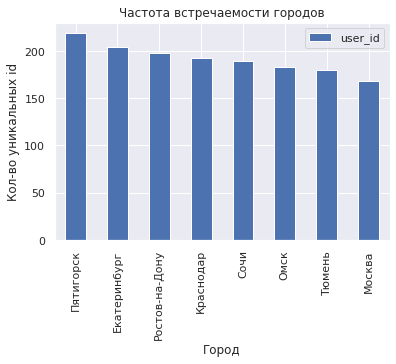

#### 2.2. Соотношение пользователей с подпиской и без

Мы выяснили, что доля пользователей сервиса с подпиской составляет 46% от общего числа пользователей, соотвественно доля людей без подписки составляет 54%.

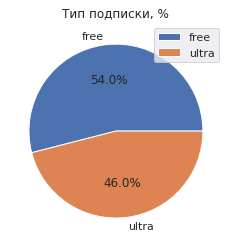

#### 2.3. Возраст пользователей

Мы также выяснили долю несовершеннолетних среди всех пользователей и нашу целевую аудиторию.

Доля несовершеннолетних составляет 5% от всех пользователей (или 79 человек).


При этом основной возраст пользователей составляет от 20 до 30 лет.

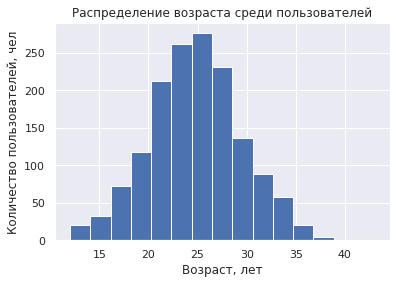

#### 2.4. Среднее расстояние, которое один пользователь проезжает за одну поездку

На данном этапе мы исследовали данные о расстоянии, которое проезжает каждый пользователь. Обнаружили выбросы в данных - значения, которые сильно отличаются от большинства показателей (например, расстояние в 0.85 метра, или свыше 7000 метров).
Мы обработали данные выбросы, с помощью диаграммы размаха установили, какие значения можно считать нормальными.

Анализ показал, что нормальные значения располагаются в диапазоне от 1000 до 5500 метров.

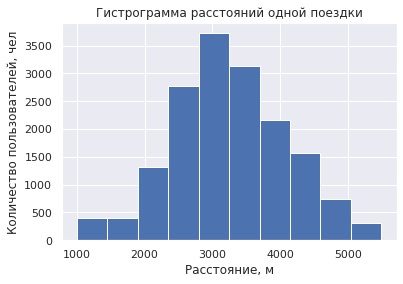

Таким образом, среднее значение одной поездки у одного пользователя составляет 3251 метр.

#### 2.5. Средняя продолжительность одной поездки

На данном этапе мы исследовали данные о длительности поездки каждого пользователя. Здесь мы также обнаружили аномальные значения в данных (выбросы) - например, минимальное значение до обработки данных составляло 0.5 минуты, а максимальное - 40 минут (!). Мне кажется здоровый человек вряд ли будет ехать куда-то на самокате так долго, вероятно такие значения свидетельствуют о том, что человек мог не вовремя закрыть сессию и/или не смог сделать это.

Мы также обработали данные от выбросов, построили диаграмму размаха и установили, что нормальные значения распологаются в диапазоне от 3 до 33 минут.

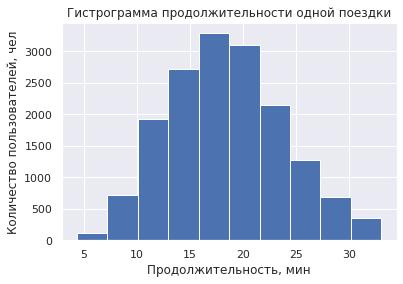

Таким образом, средняя длительность одной поездки составляет 18-19 минут.

#### 2.6 Промежуточный вывод

Итак, согласно нашему общему исследованию о всех пользователях можно сказать, что:
- наибольшее количество уникальных пользователей находится в Краснодаре - **219** человек, а наименьшее в Москве - **168** человек;
- доля пользователей с подпиской - **46%**, без подписки - **54%**;
- основной возраст пользователей составляет **от 20 до 30 лет**;
- среднее расстояние, которое проезжает один пользователь за одну поездку - **3251 метр**;
- средняя продолжительность одной поездки у одного пользователя составляет **18** минут.

### **3. Исследовательский анализ по категориям подписки**

На стоимость поездки влияет наличие подписки у пользователя:
- если пользователь без подписки, он заплатит за одну поездку длительностью в 18 минут: тариф за минуту * количество минут + стоимость начала поездки = 8 * 18 + 50 = 194 рубля
- если пользователь с подпиской, то за то же время он заплатит: 6 * 18 + 0 = 108, но с учетом подписки 199 руб/мес получается 307 рублей. Можно пересчитать подписку на количество дней в месяце (допустим, 30) и тогда за одну поездку у человека с подпиской выйдет 108 + 6,64 = 108,64 рубля.

Выгода для пользователя зависит от его целей) А мы хотели узнать, отличается ли среднее расстояние и длительность поездки у пользователей с подпиской и без.

Сначала мы сделали срез по общей таблице, отфильтровав значения по столбцу ```subscribtion_type```, и потом стали анализировать данные отдельно по каждой категории пользователей.

#### 3.1  Информация о пользователях с подпиской

Мы взяли данные о продолжительности поездки и расстоянии каждой поездки пользователей с подпиской.

Данные о расстоянии и данные о длительности поездки также содержали аномальные значения. Построив диаграмму размаха, мы выяснили, что нормальное значение о расстоянии располагается в диапазоне от 1850 до 4500 метров, а нормальное значение о длительности поездки располагается в диапазоне меньше 34 минут.

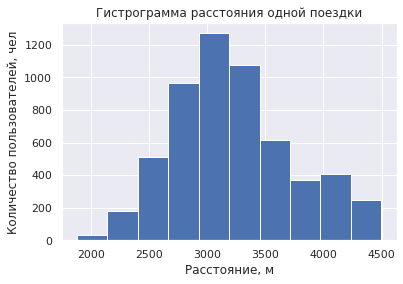

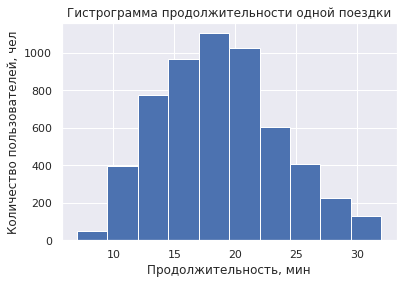

Таким образом, в среднем пользователи с подпиской совершают поездки либо длительностью около 18-19 минут, либо на расстоянии около 3100-3200 метров.

Также мы посчитали коэффициент корреляции Пирсона между расстоянием и продолжительностью поездки

Данный коэффициент оказался равен **0.49** - такое значение говорит нам о слабой связи двух переменных, изменение расстояния слабо зависит от изменения продолжительности поездки, поэтому мы не можем говорить, что чем больше расстояние, тем дольше длится поездка.

#### 3.1  Информация о пользователях без подписки

Мы взяли данные о продолжительности поездки и расстоянии каждой поездки пользователей без подписки.

Данные о расстоянии и данные о длительности поездки также содержали аномальные значения. Построив диаграмму размаха, мы выяснили, что нормальное значение о расстоянии располагается в диапазоне от 100 до 6000 метров, а нормальное значение о длительности поездки располагается в диапазоне меньше 35 минут.

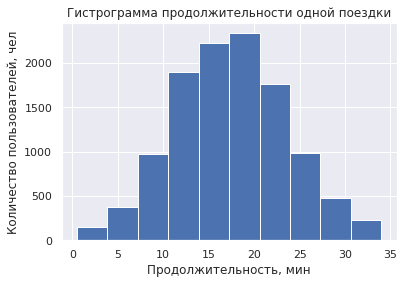

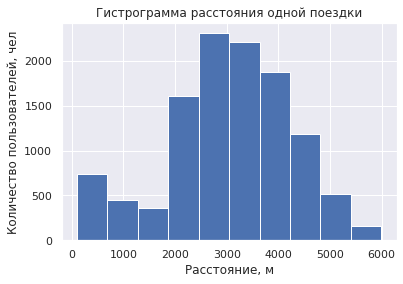

Можно сделать вывод, что пользователи без подписки либо совершают поездки по времени около 17 минут, либо в среднем преодолевают расстояние около 3000-3100 метров.

Здесь мы тоже посчитали коэффициент Пирсона, значение равно **0.55**, что указывает на более сильную связь переменных расстояния и продолжительности поездки, чем в предыдущем пункте, но все еще не такую сильную, чтобы сделать вывод о линейной зависимости двух переменных.

#### 3.3 Промежуточный вывод

Изучив данные в разрезе категорий подписок, мы можем сказать, что:
- пользователи с подпиской совершают поездки либо длительностью около 18-19 минут, либо на расстоянии около 3100-3200 метров;
- пользователи без подписки либо совершают поездки по времени около 17 минут, либо в среднем преодолевают расстояние около 3000-3100 метров
- коэффициент корреляции Пирсона в обоих случаях показывает, что данные о расстоянии и продолжительности поездки слабо коррелируют друг с другом. (0.49 и 0.55 соответственно)

Таким образом, пользователи с подпиской проезжают на 100м дальше или на 1 минуту дольше.

### **4. Проверка гипотез**

### 4.1 Тратят ли пользователи с подпиской больше времени на поездки?

Мы хотели проверить гипотезу о том, тратят ли пользователи с подпиской больше времени на поездки, чем без подписки.

Мы использовали двувыборочный правосторонний тест Стюдента для двух независимых выборок, взяли данные о времени поездок пользователей обеих категорий, сравнили P-value (1.2804098316645618e-34) со статистической значимостью (0.05), P-value < стат. значимости.

Мы определили гипотезы:

- H0 - среднее время поездки пользователей обеих категорий одинаковое.
- H1 - среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки.

Мы определили, что необходимо **отвергнуть нулевую гипотезу** в пользу альтернативной. То есть мы можем утверждать, что среднее время поездки пользователей обеих категорий одинаковое.

### 4.2 Расстояние одной поездки

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.

Мы хотели проверить гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

Для отработки данной гипотезы мы использовали одновыборочный t-test правосторонний тест Стюдента, взяли данные о расстоянии, которое преодолевают пользователи с подпиской, сравнили P-value (0.9195368847849785) со статистической значимостью (0.05), P-value > стат. значимости.

Мы определили следующие гипотезы:

- H0 - истинное среднее расстояние меньше либо равно 3130 метров.
- H1 - истинное среднее значение расстояние больше 3130 метров.

Мы опредедлили, что **отвергнуть нулевую гипотезу нельзя**, то есть нельзя утверждать, что в среднем пользователи с подпиской проезжают больше 3130 метров за одну поездку.

### 4.3 Помесячная выручка

Мы хотели протестировать гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Перед тем, как проводить тестирование гипотезы, мы агрегировали данные, и посчитали выручку по каждому пользователю помесячно. Затем мы сделали срез данных в зависимости от категории и составили выборки, содержащие данные о месячной выручке пользователей с подпиской и без подписки.

Затем мы использовали правосторонний двувыборочный тест Стюдента по следующим гипотезам:

- H0 - среднее значение помесячной выручки от подписчиков равно среднему значению выручки от пользователей без подписки.
- H1 - среднее значение помесячной выручки от подписчиков больше, чем среднее значение выручки от пользователей без подписки.

Затем сравнили P-value (2.8130926188487286e-35) со статистической значимостью (0.05), P-value < стат. значимости.
.
Согласно результатам теста нам необходимо **отвергнуть нулевую гипотезу**, то есть мы не можем утверждать, что среднее значение помесячной выручки от подписчиков равно среднему значению выручки от пользователей без подписки.

### 4.4 Промежуточный вывод

Таким образом:
1. Мы должны проверить альтернативную гипотезу о том, что пользователи с подпиской тратят больше времени на поездку, чем без (соотвественно, отвергаем нулевую гипотезу, что средние значения обеих категорий равны);
2. Мы не можем утверждать, что в среднем пользователи с подпиской проезжают больше 3130 метров за одну поездку
3. Мы должны проверить альтернативную гипотезу о том, что среднее значение помесячной выручки от пользователей с подпиской больше, чем среднее значение помесячной выручки от пользователей без подписки (т.е. отвергаем гипотезу, что средние значеня помесячной выручки равны).